In [1]:
import sys
sys.path.append('/opt/conda/pkgs')
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/4262b1bf4bf1ffb403c0eb7a42ad5906_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/4506eccf78279d93d0e8a34c035e91c5_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/6bda807e3967eae797c7b1b9eeaee8db_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/c2a47d89d1d34e789fdf782557bb7194_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/c6c5514ada15b890fb27d1e36371554c_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/d964a294c2d0fef56a434c021026281e_/lib/python3.12/site-packages")
sys.path.append("/home/miaocj/docker_dir/kNN-overlap-finder/.snakemake/conda/e1c932db5cd4271709e54d8028824bc9_/lib/python3.12/site-packages")

import pickle, os, gzip, json, sys, itertools
from pathlib import Path
from importlib import reload
from dataclasses import dataclass, field
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pysam
import scipy as sp
import seaborn
import sharedmem


plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 300


sys.path.append("scripts")
sys.path.append("../../scripts")

In [20]:
import glob
evaluate_dir = '/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/human/HLA/ONT_R9/kmer_k16/'
file_list = glob.glob(evaluate_dir + '*_benchmark.csv')  
  
# 循环打开文件  
statistic_dfs =[]
for file in file_list:  
    df = pd.read_csv(file, sep='\t')
    head = file.rfind('/')
    tail = file.rfind('_') 
    df['method'] = file[head+1:tail]
    statistic_dfs.append(df)

all_stat_df = pd.concat(statistic_dfs,ignore_index = True)

visul_method = ['SimHash_None','SimHash_TF-IDF','SimHash_IDF','SimHash_TF','Minimap2', 'MinHash_Jaccard_None_None']
method_compare = all_stat_df[all_stat_df['method'].isin(visul_method)] 
all_stat_df = method_compare

In [21]:
all_stat_df = all_stat_df.replace({'MinHash_Jaccard_None_None':'MinHash'})  
all_stat_df = all_stat_df.replace({'SimHash_None':'SimHash'})  

all_stat_df.sort_index()
all_stat_df.loc[8,'cpu_time']+= 377.045 ##IGK

In [18]:
all_stat_df.sort_index()


,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,cpu_time,method
4,1688.6997,0:28:08,105217.37,115311.44,104469.44,104604.72,400.80,5.48,240.60,13639.540,SimHash_TF-IDF
8,270.6963,0:04:30,6034.02,25177.28,5974.97,5995.42,0.12,0.14,97.17,662.965,MinHash
10,1285.6258,0:21:25,71733.30,82192.19,70959.03,71106.91,25.81,0.02,179.83,6529.640,SimHash
11,20.7871,0:00:20,1755.34,20594.51,1707.18,1727.69,0.00,0.02,100.59,31.230,Minimap2
19,1346.8096,0:22:26,60555.44,71474.68,59790.97,59938.81,0.00,0.02,180.83,20300.140,SimHash_TF
20,1496.8821,0:24:56,73919.13,90666.99,73113.76,73262.05,61.43,0.02,169.69,7585.670,SimHash_IDF


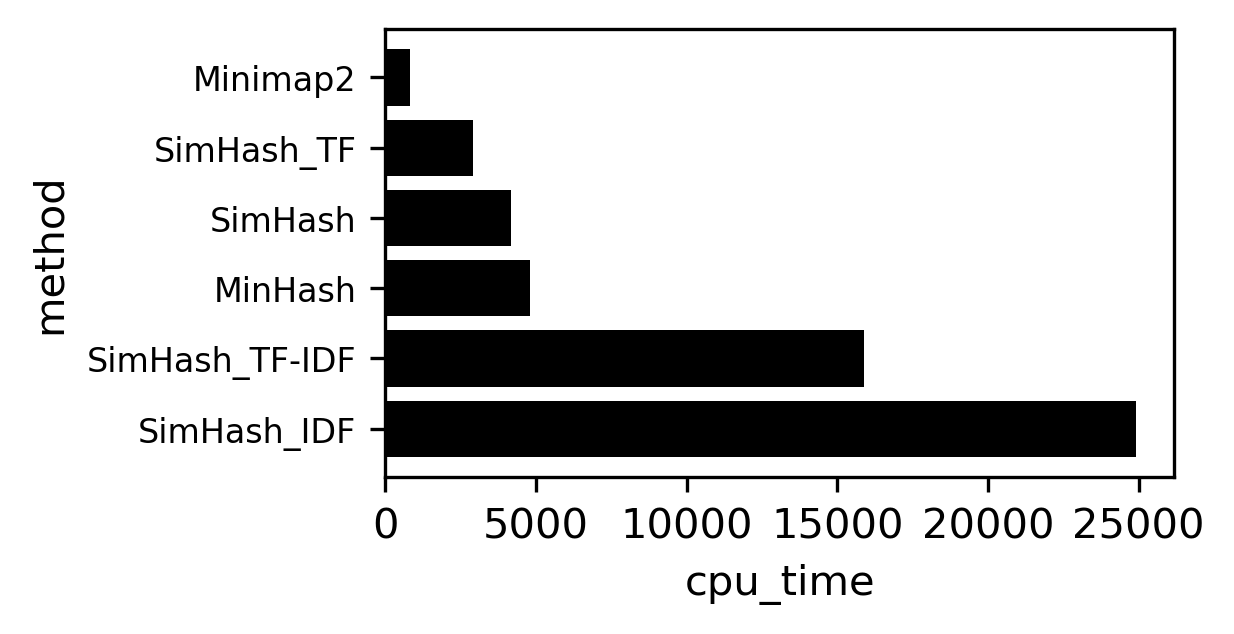

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2), constrained_layout=True) 
new = all_stat_df.sort_values(by='cpu_time',ascending=False)
colors = ['skyblue' if 'sc' in value else 'pink' for value in new['method']]
ax.barh(new['method'], new['cpu_time'],color='black')
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('cpu_time')
ax.set_ylabel('method')
plt.savefig('HLA_memory.pdf', format='pdf')  


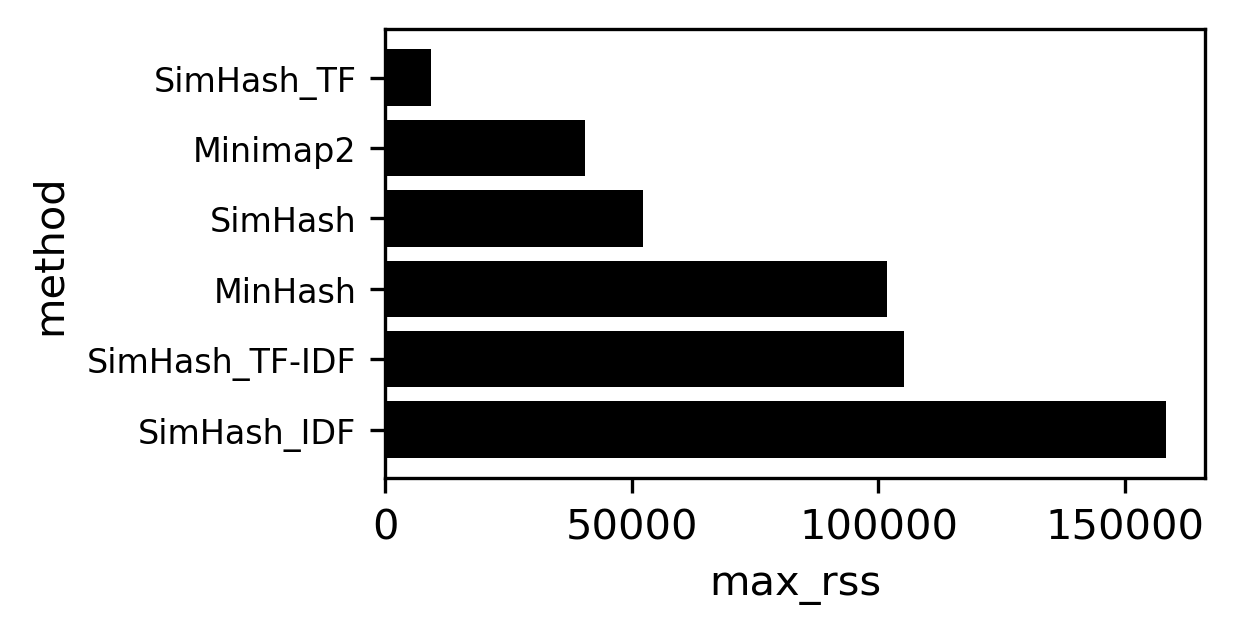

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2), constrained_layout=True) 
new = all_stat_df.sort_values(by='max_rss',ascending=False)
colors = ['skyblue' if 'sc' in value else 'pink' for value in new['method']]
ax.barh(new['method'], new['max_rss'],color='black')   
ax.tick_params(axis='y', labelsize=8)  
ax.set_xlabel('max_rss')  
ax.set_ylabel('method')  
plt.savefig('HLA_load.pdf', format='pdf')  
